In [2]:
from simsopt._core import load
# replace "NAME_OF_FILE_YOU_DOWNLOADED" with the name you gave the file
surfaces, ma, coils = load(f'serial0928241.json')

In [ ]:
from mayavi import mlab

for coil in coils:
    coil.plot(engine="mayavi", show=False)

mlab.show()

In [ ]:
for surf in surfaces:
    surf.plot(engine='mayavi', show=False)
mlab.show()

In [3]:
from pyoculus.problems import SimsoptBfieldProblem, surf_from_coils

In [4]:
surf = surf_from_coils(coils, ncoils=2, mpol=3, ntor=3)

{'ncoils': 2, 'mpol': 3, 'ntor': 3}


In [ ]:
surf.plot(engine='mayavi', show=False)
mlab.show()

In [5]:
from simsopt.geo import SurfaceRZFourier
s = SurfaceRZFourier.from_nphi_ntheta(
    mpol=5,
    ntor=5,
    stellsym=True,
    nfp=3,
    range="full torus",
    nphi=64,
    ntheta=24,
)
s.fit_to_curve(ma, 0.7, flip_theta=False)

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

s.plot(engine='mayavi', show=False)
mlab.show()

In [ ]:
from simsopt.geo import SurfaceScaled
surf = SurfaceScaled(surfaces[0])
#surf.update_fixed()
surf = surf.to_RZFourier()

In [ ]:
for coil in coils:
    coil.plot(engine="mayavi", show=False)

surf.plot(engine='mayavi', show=False)
mlab.show()

In [6]:
R0, _, Z0 = ma.gamma()[0,:]
ps = SimsoptBfieldProblem.from_coils(R0=R0, Z0=Z0, Nfp=3, coils=coils, interpolate=True, surf=s) # ncoils=2, mpol=5, ntor=5, n=40, h=0.05)

In [ ]:
ps.surfclassifier.__dict__

In [7]:
import numpy as np

In [8]:
phis = [0]    #[(i / 4) * (2 * np.pi / nfp) for i in range(4)]

nfieldlines = 10
Rs = np.linspace(0.884, 1.2, nfieldlines)
Zs = np.zeros_like(Rs)
RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

nfieldlines = 60
p1 = np.array([1.09955, 0.0712])
p2 = np.array([1.4016, 0.1072])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
# Rs, Zs = np.meshgrid(Rs, Zs)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])
RZs = np.concatenate((RZs, RZs2))

nfieldlines = 10
p1 = np.array([1.385, 0.])
p2 = np.array([1.526, 0.])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])
RZs = np.concatenate((RZs, RZs2))

nfieldlines = 10
p1 = np.array([1.4446, 0.])
p2 = np.array([1.4822, 0.])
Rs = np.linspace(p1[0], p2[0], nfieldlines)
Zs = np.linspace(p1[1], p2[1], nfieldlines)
RZs2 = np.array([[r, z] for r, z in zip(Rs.flatten(), Zs.flatten())])
RZs = np.concatenate((RZs, RZs2))

In [ ]:
ps._mf_B.estimate_error_B(10000)

In [9]:
from horus import poincare

In [17]:
pplane = poincare(ps._mf_B, RZs, phis, ps.surfclassifier, tmax = 15000, tol = 1e-10, plot=False)

In [11]:
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.style.use('lateky')

In [22]:
plt.ioff()
fig, ax = pplane.plot(phis)
ax = ax[0,0]

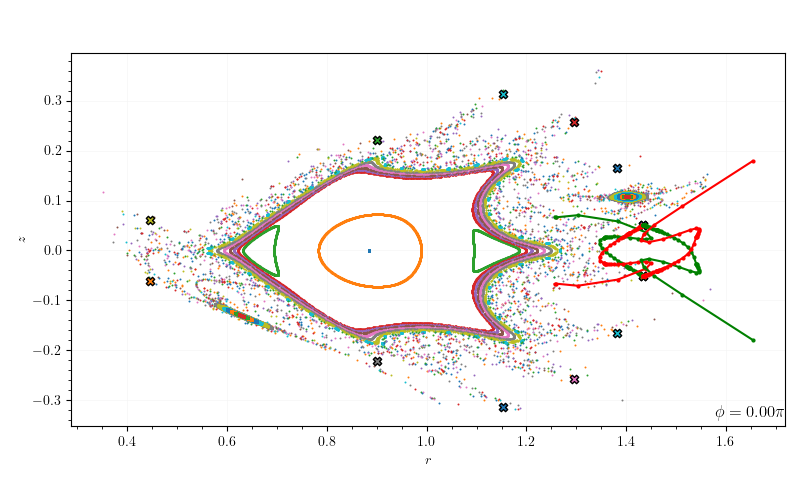

In [49]:
display(fig.canvas)

In [103]:
import pandas as pd

In [105]:
data = [
    {'r': fp11_x1.x[0], 'z': fp11_x1.z[0], 'GreenesResidue': fp11_x1.GreenesResidue},
    {'r': fp11_x2.x[0], 'z': fp11_x2.z[0], 'GreenesResidue': fp11_x2.GreenesResidue},
    {'r': fp11_o1.x[0], 'z': fp11_o1.z[0], 'GreenesResidue': fp11_o1.GreenesResidue},
    {'r': fp11_o2.x[0], 'z': fp11_o2.z[0], 'GreenesResidue': fp11_o2.GreenesResidue},
    {'r': fp11_o3.x[0], 'z': fp11_o3.z[0], 'GreenesResidue': fp11_o3.GreenesResidue},
    {'r': fp11_o4.x[0], 'z': fp11_o4.z[0], 'GreenesResidue': fp11_o4.GreenesResidue},
]

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
df

,r,z,GreenesResidue
0,1.433781,0.051404,-2.161867
1,1.433781,-0.051404,-2.161867
2,1.444636,0.000000,1.098715
3,1.346296,0.213304,1.098715
4,1.401504,0.108159,0.547538
5,1.401504,-0.108159,0.547538


In [24]:
from pyoculus.problems import FixedPoint

In [25]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["tol"] = 1e-15
pparams['niter'] = 100
# pparams["Z"] = 0 

fp11_o1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_o1.compute(guess=[1.4446355574662593, 0.0], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

fp11_o2 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_o2.compute(guess=[1.346295615988142, 0.2133036397909969], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

0 - [DeltaR, DeltaZ] : [-1.00364161e-12 -5.99894591e-13] - dtheta : 12.566370920451874
0 - [DeltaR, DeltaZ] : [3.61932706e-14 1.47937218e-14] - dtheta : 12.566370964047485


In [55]:
fp11_o3 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_o3.compute(guess=[1.40150403 0.10815878], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

fp11_o4 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_o4.compute(guess=[1.40150403 -0.10815878], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

0 - [DeltaR, DeltaZ] : [-0.00064877 -0.00020954] - dtheta : 12.566507503918576
0 - [StepR, StepZ]: [ 3.94704881e-06 -1.91181670e-04]
1 - RZ : [1.40150395 0.10815882] - rhotheta : [0.52840845 0.20614485]
1 - [DeltaR, DeltaZ] : [-3.19746385e-08 -6.55054847e-08] - dtheta : 12.566371061284364
1 - [StepR, StepZ]: [ 8.62655625e-08 -3.71573526e-08]
2 - RZ : [1.40150403 0.10815878] - rhotheta : [0.52840853 0.20614475]
2 - [DeltaR, DeltaZ] : [-1.03472786e-13 -2.85188539e-14] - dtheta : 12.56637095546537
0 - [DeltaR, DeltaZ] : [0.00065763 0.00020952] - dtheta : 12.56572842626399
0 - [StepR, StepZ]: [4.33498856e-06 1.91108510e-04]
1 - RZ : [ 1.40150433 -0.10815889] - rhotheta : [ 0.52840884 -0.20614484]
1 - [DeltaR, DeltaZ] : [4.81935509e-08 2.08945413e-07] - dtheta : 12.566370506382855
1 - [StepR, StepZ]: [-3.01674572e-07  1.10316067e-07]
2 - RZ : [ 1.40150403 -0.10815878] - rhotheta : [ 0.52840853 -0.20614475]
2 - [DeltaR, DeltaZ] : [1.52100554e-13 1.44967371e-13] - dtheta : 12.566370910094308


In [26]:
fp11_x1 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_x1.compute(guess=[1.43378117, 0.05140443], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

0 - [DeltaR, DeltaZ] : [-1.39825924e-08 -8.58280832e-09] - dtheta : 12.566370947288604
0 - [StepR, StepZ]: [1.97670325e-09 7.20732508e-10]
1 - RZ : [1.43378117 0.05140443] - rhotheta : [0.55189699 0.09327655]
1 - [DeltaR, DeltaZ] : [1.20126131e-13 7.72715225e-14] - dtheta : 12.566370930405808


In [27]:
fp11_x2 = FixedPoint(ps, pparams, integrator_params=iparams)
fp11_x2.compute(guess=[1.43378117, -0.05140443], pp=3, qq=6, sbegin=0.4, send=1.6, checkonly=True)

0 - [DeltaR, DeltaZ] : [-3.11180548e-09 -2.35059910e-09] - dtheta : 12.566370919085667
0 - [StepR, StepZ]: [ 1.97677408e-09 -7.20685921e-10]
1 - RZ : [ 1.43378117 -0.05140443] - rhotheta : [ 0.55189699 -0.09327655]
1 - [DeltaR, DeltaZ] : [1.2345680e-13 4.7545301e-14] - dtheta : 12.566370914336135


In [28]:
for fp in [fp11_x1, fp11_x2]:
    results11 = [list(p) for p in zip(fp.x, fp.y, fp.z)]
    for rr in results11:
        ax.scatter(rr[0], rr[2], marker="X", edgecolors="black", linewidths=1)

In [57]:
for fp in [fp11_o1, fp11_o2, fp11_o3, fp11_o4]:
    results11 = [list(p) for p in zip(fp.x, fp.y, fp.z)]
    for rr in results11:
        ax.scatter(rr[0], rr[2], marker="o", edgecolors="black", linewidths=1)

In [29]:
from pyoculus.solvers import Manifold
iparam = dict()
iparam["rtol"] = 1e-13

mp = Manifold(ps, fp11_x2, fp11_x1, integrator_params=iparam)

In [30]:
mp.choose(signs=[[1, 1],[1, -1]])

In [33]:
mp.onworking = mp.inner

In [35]:
mp.compute(nintersect = 4, epsilon=1e-6, neps = 20, directions="outer")

2024-05-30 23:04:42 [info     ] Computing manifold for directions [inner/outer/both]: outer
2024-05-30 23:04:43 [info     ] Computing unstable manifold...
2024-05-30 23:05:31 [info     ] Computing stable manifold...


In [36]:
mp.plot(ax=ax)

(<Figure size 1200x750 with 1 Axes>,
 <Axes: title={'right': '$\\phi = 0.00\\pi$ '}, xlabel='$r$', ylabel='$z$'>)

In [43]:
mp.find_clinic_single(0.001276810579762792, 0.0012768113453997163, n_s=2, n_u=2)

2024-05-30 23:11:53 [debug    ] Guess - 0.001276810579762792, 0.0012768113453997163
2024-05-30 23:11:53 [debug    ] Bounds - ((0.001276810579762792, 0.013292014643333946), (0.0012768113453997163, 0.013292018510807213))
2024-05-30 23:11:53 [debug    ] n_s, n_u - 2, 2
2024-05-30 23:11:53 [debug    ] Inside : (0.001276810579762792, 0.0012768113453997163)
2024-05-30 23:11:56 [debug    ] Returns - (array([ 1.35583692e+00, -8.18514749e-09]), array([ 1.35583691e+00, -9.60987337e-10]), array([ 1.05814653e-08, -7.22416015e-09]))
2024-05-30 23:11:56 [debug    ] Inside : (0.001276810579762792, 0.0012768113453997163)
2024-05-30 23:11:59 [debug    ] Returns - (array([ 1.35583692e+00, -8.18514749e-09]), array([ 1.35583691e+00, -9.60987337e-10]), array([ 1.05814653e-08, -7.22416015e-09]))
2024-05-30 23:11:59 [debug    ] Inside : (0.001276810579762792, 0.0012768113453997163)
2024-05-30 23:12:03 [debug    ] Returns - (array([ 1.35583692e+00, -8.18514749e-09]), array([ 1.35583691e+00, -9.60987337e-10]),

(0.001276810579762792, 0.0012768113453997163)

In [44]:
mp.find_clinic_single(0.005129109370459298, 0.0051291087795083574, n_s=2, n_u = 1, tol=1e-8)

2024-05-30 23:12:18 [debug    ] Guess - 0.005129109370459298, 0.0051291087795083574
2024-05-30 23:12:18 [debug    ] Bounds - ((0.005129109370459298, 0.04729699487764893), (0.0051291087795083574, 0.04729699431598403))
2024-05-30 23:12:18 [debug    ] n_s, n_u - 2, 1
2024-05-30 23:12:18 [debug    ] Inside : (0.005129109370459298, 0.0051291087795083574)
2024-05-30 23:12:20 [debug    ] Returns - (array([1.39322876, 0.02706297]), array([1.39322875, 0.02706297]), array([9.16874288e-09, 1.12008668e-09]))
2024-05-30 23:12:20 [debug    ] Inside : (0.005129109370459298, 0.0051291087795083574)
2024-05-30 23:12:21 [debug    ] Returns - (array([1.39322876, 0.02706297]), array([1.39322875, 0.02706297]), array([9.16874288e-09, 1.12008668e-09]))
2024-05-30 23:12:21 [debug    ] Inside : (0.005129109370459298, 0.0051291087795083574)
2024-05-30 23:12:24 [debug    ] Returns - (array([1.39322876, 0.02706297]), array([1.39322875, 0.02706297]), array([9.16874288e-09, 1.12008668e-09]))
2024-05-30 23:12:24 [deb

(0.00512910928143146, 0.005129109111296845)

In [47]:
mp.onworking = mp.outer

In [ ]:
mp.find_clinic_single(0.0015488037705831256, 0.0015488037607238807, n_s=2, n_u=2)

In [65]:
mp.find_clinic_single(0.0006060200774938109, 0.0006060193763593331, n_s=3, n_u=2)

2024-05-30 23:42:43 [debug    ] Guess - 0.00047374434535535543, 0.0004767761428561461
2024-05-30 23:42:43 [debug    ] Bounds - ((0.00047374434535535543, 0.005205155518450091), (0.0004767761428561461, 0.005236722449296285))
2024-05-30 23:42:43 [debug    ] n_s, n_u - 3, 2
2024-05-30 23:42:43 [debug    ] Inside : (0.0004737443453553554, 0.00047677614285614607)
2024-05-30 23:42:46 [debug    ] Returns - (array([ 1.52753214, -0.04096318]), array([ 1.48080357, -0.03267882]), array([ 0.04672857, -0.00828436]))
2024-05-30 23:42:46 [debug    ] Inside : (0.0004737443453553554, 0.00047677614285614607)
2024-05-30 23:42:49 [debug    ] Returns - (array([ 1.52753214, -0.04096318]), array([ 1.48080357, -0.03267882]), array([ 0.04672857, -0.00828436]))
2024-05-30 23:42:49 [debug    ] Inside : (0.0004737443453553554, 0.00047677614285614607)
2024-05-30 23:42:51 [debug    ] Returns - (array([ 1.52753214, -0.04096318]), array([ 1.48080357, -0.03267882]), array([ 0.04672857, -0.00828436]))
2024-05-30 23:42:5

(0.0006060200774938109, 0.0006060193763593331)

In [67]:
mp.onworking = mp.inner

In [68]:
mp.turnstile_area()

2024-05-30 23:46:49 [info     ] Forward integration goes beyond stable saddle point.
2024-05-30 23:46:49 [debug    ] rfp: [ 1.43378117 -0.05140443], rz_end: [ 1.45838009 -0.04227938], rz: [ 1.43620375 -0.05057199]
2024-05-30 23:47:11 [info     ] Backward integration goes beyond stable saddle point.
2024-05-30 23:47:11 [debug    ] rfp: [1.43378117 0.05140443], rz_end: [1.45832003 0.04230331], rz: [1.43619751 0.05057418]
2024-05-30 23:47:11 [info     ] Potential integration completed for homo/hetero-clinic point of order : 1.277e-03
2024-05-30 23:47:35 [info     ] Forward integration goes beyond stable saddle point.
2024-05-30 23:47:35 [debug    ] rfp: [ 1.43378117 -0.05140443], rz_end: [ 1.45322055 -0.04430188], rz: [ 1.43564426 -0.05073967]
2024-05-30 23:47:59 [info     ] Backward integration goes beyond stable saddle point.
2024-05-30 23:47:59 [debug    ] rfp: [1.43378117 0.05140443], rz_end: [ 1.53410114 -0.01022141], rz: [1.45319293 0.04431256]
2024-05-30 23:47:59 [info     ] Potent

array([ 0.00053154, -0.00053154])

In [86]:
mp.onworking = mp.outer

In [87]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
confns = mp.onworking["find_clinic_configuration"]
n_u = confns["n_u"]+confns["n_s"]+2

for i, clinic in enumerate(mp.onworking["clinics"]):
    eps_s_i, eps_u_i = clinic[1:3]
    
    hu_i = mp.integrate(mp.onworking["rfp_u"] + eps_u_i * mp.onworking["vector_u"], n_u, 1)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

In [1]:
mp.inner["areas"][0]

NameError: name 'mp' is not defined

In [ ]:
mp.outer["areas"][1]

In [116]:
fig_conv, ax_conv = plt.subplots()

# ar = np.zeros((2, 3))
for ii, pot in enumerate(mp.inner["potential_integrations"]):
    ns = min(len(pot[0]), len(pot[1]))
    # ar[ii,:] = pot[0][1:ns]-pot[1][:ns-1]
    ax_conv.scatter(1+np.arange(ns-1), pot[0][1:ns]-pot[1][:ns-1], zorder=10)

for ii, pot in enumerate(mp.outer["potential_integrations"]):
    ns = min(len(pot[0]), len(pot[1]))
    # ar[ii,:] = pot[0][1:ns]-pot[1][:ns-1]
    ax_conv.scatter(1+np.arange(ns-1), pot[0][1:ns]-pot[1][:ns-1], zorder=10)

ax_conv.set_xlabel('Iteration')
ax_conv.set_ylabel('Potential integration')

Text(0, 0.5, 'Potential integration')

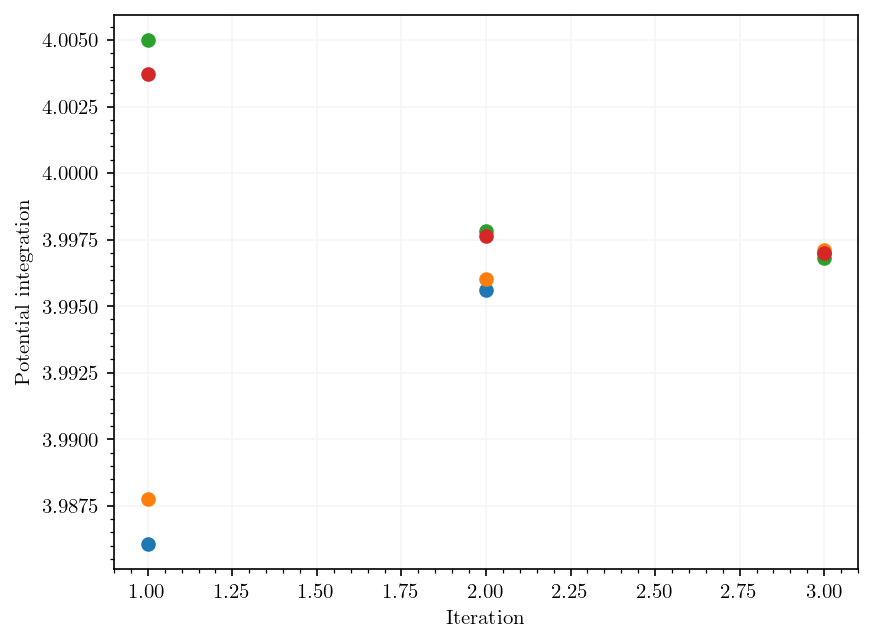

: 

In [117]:
fig_conv

In [ ]:
sum0 = 0
sums = np.zeros(13)
for ii, a in enumerate(ar.T):
    sum0 += a[1]-a[0]
    sums[ii] = sum0 

In [ ]:
plt.scatter(np.arange(13), sums)
plt.show()